# B929164 Machine Learning CW1

This project aims to create a machine learning model that could determine if a customer would be a good fit to receive a line of credit or not based on a number of relevant financial features.

The data set being used can be found [here](https://www.kaggle.com/c/home-credit-default-risk/data). First published by Hans Hofmann, it contains financial information about german customers from 1994.

A machine learning model that can predict whether a customer should be given credit can be useful for several reasons, lending institutions, such as banks or credit card companies, can use this model to assess the risk associated with providing credit to a particular customer by analysing various factors and patterns in the customer's data. This information helps lenders make informed decisions about granting credit and setting appropriate terms and interest rates. Additionally it can also improve efficiency by automating the process of assessing credit risk.

Furthermore, it can also benefit the customer as customers can use this model to assess their own credit risk and make informed decisions about applying for credit without having to go through the process of applying for credit and being rejected which can have a negative impact on their credit score. It can also eliminate bias that may be present in human decision making.

## Importing Libraries

In [1]:
# [Imports]

# General purpose data manipulation libraries
import pandas as pd
import numpy as np

# Data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# File system management
import os
import warnings
warnings.filterwarnings('ignore')

# Machine learning libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## Downloading and Importing Data

In [3]:
# This section will search the current directory for the data file (credit_customers.csv) 
# if it is not found in the current directory, it will download it from the GitHub repository.

if os.path.isfile('credit_customers.csv'):
    print('File is present')
    df = pd.read_csv('credit_customers.csv')
else:
    try:
        print('File is not present. Downloading file from GitHub repository...')
        url = 'https://raw.githubusercontent.com/ajayvarghese2000/22WSD074-Machine-Learning-Principles-CW2/main/credit_customers.csv'
        df = pd.read_csv(url)
        df.to_csv('credit_customers.csv', index=False)
        print('File downloaded successfully')
    except:
        print('Unable to download file from GitHub repository. Please check your internet connection and try again.')

File is not present. Downloading file from GitHub repository...
File downloaded successfully


## Data Preparation

The following steps will explore the dataset and ensure it is ready for the machine learning model and EDA

In [4]:
# Display the first 5 rows of the dataset
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,...,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,...,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,bad


Here there are 21 features with 1000 rows of data. The features are a mix of categorical and numerical data. The target variable is the 'class' column which is either good or bad denoting whether the customer is a good fit for credit or not.

The definitions of the other features are as follows below:

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         1000 non-null   object 
 1   duration                1000 non-null   float64
 2   credit_history          1000 non-null   object 
 3   purpose                 1000 non-null   object 
 4   credit_amount           1000 non-null   float64
 5   savings_status          1000 non-null   object 
 6   employment              1000 non-null   object 
 7   installment_commitment  1000 non-null   float64
 8   personal_status         1000 non-null   object 
 9   other_parties           1000 non-null   object 
 10  residence_since         1000 non-null   float64
 11  property_magnitude      1000 non-null   object 
 12  age                     1000 non-null   float64
 13  other_payment_plans     1000 non-null   object 
 14  housing                 1000 non-null   o

In [42]:
# Check for missing values
df.isnull().sum()

checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
class                     0
dtype: int64

Here as there are no missing values, there is no need to impute any data. However, there are some categorical features that need to be encoded before they can be used in the model.
The next section will explore the data further.

## Initial Data Exploration

### checking_status	

In [10]:
# Get the unique values in the checking_status column
df['checking_status'].unique()

array(['<0', '0<=X<200', 'no checking', '>=200'], dtype=object)

Here the status of the checking account is given as a categorical variable. The categories are as follows:

<!-- Table of categories -->
<table>
<thead>
  <tr>
    <th>Category</th>
    <th>Definition</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td>no checking</td>
    <td>&lt; They do not have a checking account</td>
  </tr>
  <tr>
    <td>&lt; 0 DM</td>
    <td>&lt; They have less than 0 DM in their account</td>
  </tr>
  <tr>
    <td>0&lt; ... &lt; 200 DM</td>
    <td>&lt; They have between 0 and 200 DM in their account</td>
  </tr>
  <tr>
    <td>&gt;= 200 DM</td>
    <td>&lt; They have more than 200 DM in their account</td>
  </tr>
</tbody>
</table>

As this is a german dataset all the values are in DM (Deutsche Mark) which is the currency used in Germany before the Euro was introduced. 200 DM is equivalent to about £2076.3 in today's money.

<Axes: xlabel='checking_status', ylabel='count'>

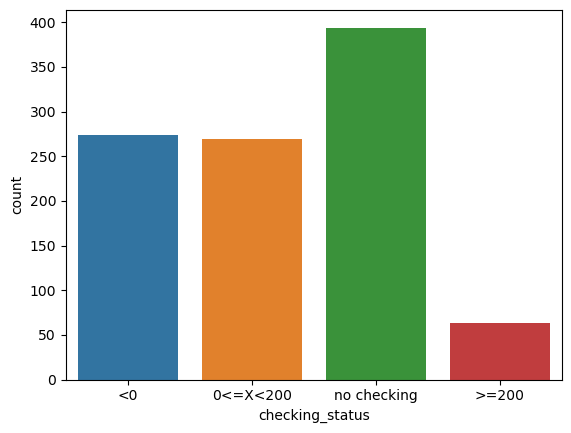

In [19]:
# Plotting a graph of the number of data point in each checking_status category
sns.countplot(x='checking_status', data=df)

Here we can see there is a almost equal split between the categories < 0 DM and 0 < ... < 200 DM. 
However there are a disproportionate amount of customers with no checking account and a very small amount of customers with more than 200 DM in their account.
This will impact the model as it will be biased towards customers with no checking account.

Text(0, 0.5, 'Percentage')

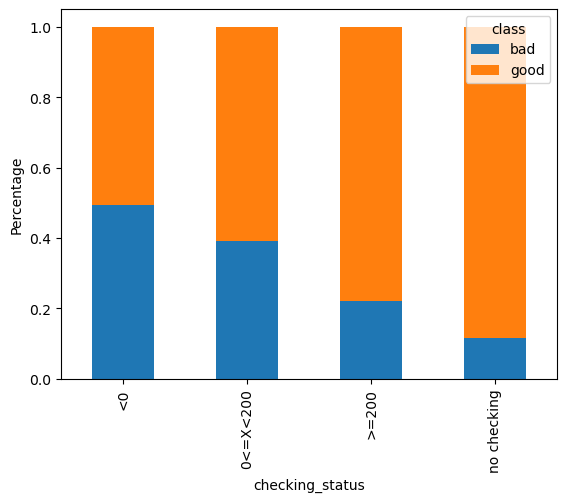

In [62]:
# For each category in the checking_status column, get the percentage of customers who are classed as good and bad then plot the results as a bar chart with two stacked bars for each category
df.groupby('checking_status')['class'].value_counts(normalize=True).unstack().sort_values(by='bad', ascending=False).plot(kind='bar', stacked=True)

# Y axis label
plt.ylabel('Percentage')

Here we can see that there seems to be a trend where the more money you have in a checking account then the higher the chance of being a good fit for credit. This makes sense as having more money in your account means you are more likely to be able to pay back the credit.

However, having no checking account seems to have a higher chance of being a good fit for credit than having less than 0 DM in your account which is a bit of an outlier at first glance.

### duration

In [68]:
# Get the unique values in the duration column
df['duration'].unique()

array([ 6., 48., 12., 42., 24., 36., 30., 15.,  9., 10.,  7., 60., 18.,
       45., 11., 27.,  8., 54., 20., 14., 33., 21., 16.,  4., 47., 13.,
       22., 39., 28.,  5., 26., 72., 40.])

Duration is the length of time that customer wants to take the loan out for. This is a numerical value in months.

<Axes: xlabel='duration', ylabel='count'>

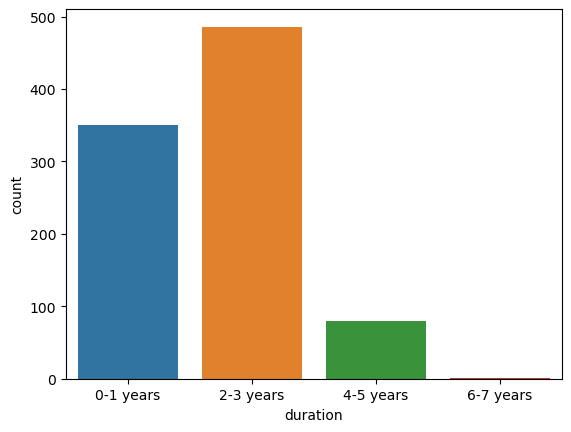

In [77]:
# Copy the dataframe to a local variable to avoid making changes to the original dataframe
local_df = df.copy()

# Convert the duration column from months to years
local_df['duration'] = round(local_df['duration'] / 12, 0)

# Group the duration column into 4 categories 0-1 years, 2-3 years, 4-5 years, 6-7 years
local_df['duration'] = pd.cut(local_df['duration'], bins=[0, 1, 3, 5, 7], labels=['0-1 years', '2-3 years', '4-5 years', '6-7 years'])

# Plotting a graph of the number of data point in each duration category
sns.countplot(x='duration', data=local_df)

From here it is clear to see that we have a bias to loans of 0-3 years with a peak at 2 years. 
This means that the model will be better at assessing loans of this length and may not be as accurate for loans of other lengths, especially those in the 6-7 year range.

Text(0, 0.5, 'Percentage')

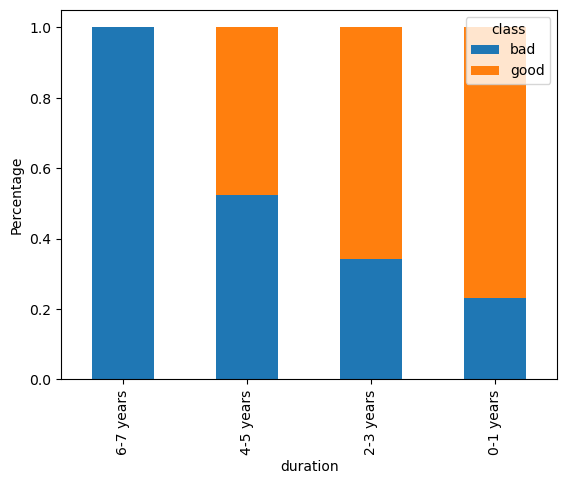

In [79]:
# For each category in the checking_status column, get the percentage of customers who are classed as good and bad then plot the results as a bar chart with two stacked bars for each category
local_df.groupby('duration')['class'].value_counts(normalize=True).unstack().sort_values(by='bad', ascending=False).plot(kind='bar', stacked=True)

# Y axis label
plt.ylabel('Percentage')

Here we can see that the longer the duration of the loan, the higher the chance of being a bad fit for credit. This makes sense as the longer the duration of the loan, the more time there is for the customer to default on the loan and not pay it back.

However the reality may not be as extreme as this graph suggests as there are very few loans with a duration of 6-7 years biasing the graph towards the shorter duration loans.

### credit_history

In [13]:
# Get the unique values in the credit_history column
df['credit_history'].unique()

array(['critical/other existing credit', 'existing paid',
       'delayed previously', 'no credits/all paid', 'all paid'],
      dtype=object)

Credit history is a categorical variable that describes the customer's credit history. The categories are as follows:

<!-- Table of categories -->
<table>
<thead>
  <tr>
    <th>Category</th>
    <th>Definition</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td>no credits/all paid</td>
    <td>They have never taken out credit and therefore have always paid it back on time</td>
  </tr>
  <tr>
    <td>all paid</td>
    <td>They have taken out credit before and have always paid it back on time</td>
  </tr>
  <tr>
    <td>existing paid</td>
    <td>They have taken out credit before and have always paid it back on time</td>
  </tr>
  <tr>
    <td>delayed previously</td>
    <td>They have taken out credit before and have paid it back late</td>
  </tr>
  <tr>
    <td>critical/other existing credit (not at this bank)</td>
    <td>They have taken out credit before and have paid it back late</td>
  </tr>

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'critical/other existing credit'),
  Text(1, 0, 'existing paid'),
  Text(2, 0, 'delayed previously'),
  Text(3, 0, 'no credits/all paid'),
  Text(4, 0, 'all paid')])

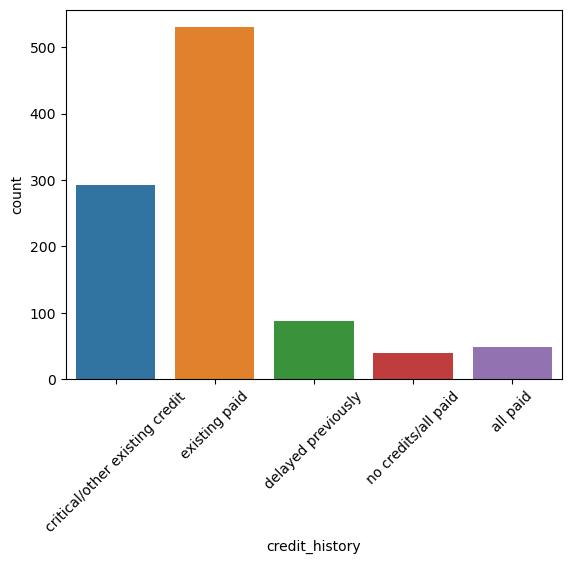

In [35]:
# Plotting a graph of the number of data point in each credit_history category
sns.countplot(x='credit_history', data=df)

# Angle the x-axis labels to avoid overlapping
plt.xticks(rotation=45)

Here we can see that the majority of customers have exiting paid credit history. This means that the model will be better at assessing customers with this credit history and may not be as accurate for customers with other little to np credit history.

Text(0, 0.5, 'Percentage')

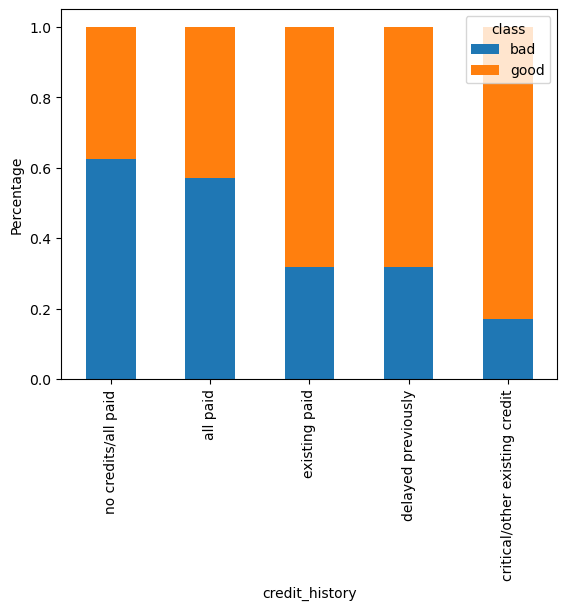

In [80]:
# For each category in the credit_history column, get the percentage of customers who are classed as good and bad then plot the results as a bar chart with two stacked bars for each category sorted by the percentage of bad customers
df.groupby('credit_history')['class'].value_counts(normalize=True).unstack().sort_values(by='bad', ascending=False).plot(kind='bar', stacked=True)

# Y axis label
plt.ylabel('Percentage')

### Purpose

In [14]:
# Get the unique values in the purpose column
df['purpose'].unique()

array(['radio/tv', 'education', 'furniture/equipment', 'new car',
       'used car', 'business', 'domestic appliance', 'repairs', 'other',
       'retraining'], dtype=object)

Purpose is a categorical variable that describes the purpose of the loan. The categories are as follows:

<!-- Table of categories -->
<table>
<thead>
  <tr>
    <th>Category</th>
    <th>Definition</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td>new car</td>
    <td>They are taking out a loan to buy a new car</td>
  </tr>
  <tr>
    <td>used car</td>
    <td>They are taking out a loan to buy a used car</td>
  </tr>
  <tr>
    <td>furniture/equipment</td>
    <td>They are taking out a loan to buy furniture or equipment</td>
  </tr>
  <tr>
    <td>radio/television</td>
    <td>They are taking out a loan to buy a radio or television</td>
  </tr>
  <tr>
    <td>domestic appliances</td>
    <td>They are taking out a loan to buy domestic appliances</td>
  </tr>
  <tr>
    <td>repairs</td>
    <td>They are taking out a loan to pay for repairs</td>
  </tr>
  <tr>
    <td>retraining</td>
    <td>They are taking out a loan to pay for retraining</td>
  </tr>
  <tr>
    <td>business</td>
    <td>They are taking out a loan to pay for business</td>
  </tr>
  <tr>
    <td>other</td>
    <td>They are taking out a loan for another purpose</td>
  </tr>

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radio/tv'),
  Text(1, 0, 'education'),
  Text(2, 0, 'furniture/equipment'),
  Text(3, 0, 'new car'),
  Text(4, 0, 'used car'),
  Text(5, 0, 'business'),
  Text(6, 0, 'domestic appliance'),
  Text(7, 0, 'repairs'),
  Text(8, 0, 'other'),
  Text(9, 0, 'retraining')])

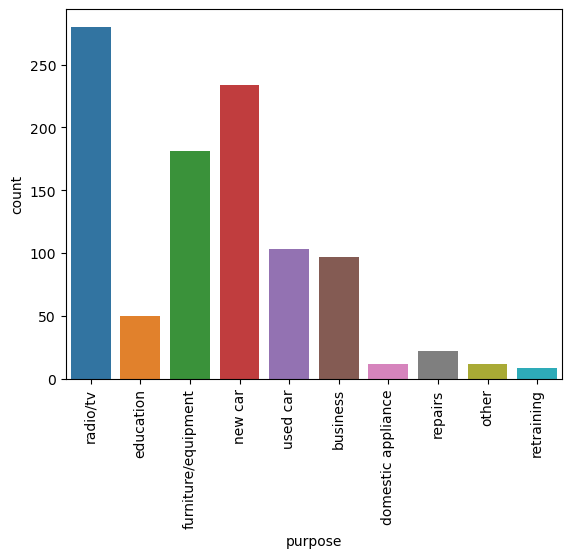

In [41]:
# Plotting a graph of the number of data point in each purpose category
sns.countplot(x='purpose', data=df)

# Angle the x-axis labels to avoid overlapping
plt.xticks(rotation=90)

<Axes: xlabel='purpose'>

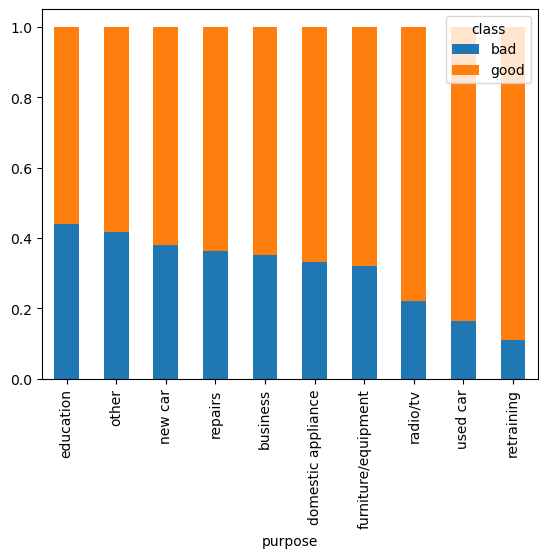

In [81]:
# For each category in the purpose column, get the percentage of customers who are classed as good and bad then plot the results as a bar chart with two stacked bars for each category sorted by the percentage of bad customers
df.groupby('purpose')['class'].value_counts(normalize=True).unstack().sort_values(by='bad', ascending=False).plot(kind='bar', stacked=True)

Here there doesn't seem to be any obvious pattern in the data, most of the reasons seem to have the same proportion of good and bad customers apart from the radio/tv and used car category. However, there are a disproportionate amount of customers taking out loans for new cars and radio/television. This will impact the model as it will be biased towards customers taking out loans for these purposes.  

### credit_amount

In [16]:
# Get the unique values in the credit_amount column
df['credit_amount'].count()

1000

In [43]:
# Get the info about the credit_amount column
df['credit_amount'].describe()

count     1000.000000
mean      3271.258000
std       2822.736876
min        250.000000
25%       1365.500000
50%       2319.500000
75%       3972.250000
max      18424.000000
Name: credit_amount, dtype: float64

The credit amount is a numerical value that describes the amount of credit the customer is taking out.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '0-2000'),
  Text(1, 0, '2001-4000'),
  Text(2, 0, '4001-6000'),
  Text(3, 0, '6001-8000'),
  Text(4, 0, '8001-10000'),
  Text(5, 0, '10001-12000'),
  Text(6, 0, '12001-14000'),
  Text(7, 0, '14001-16000'),
  Text(8, 0, '16001-18000'),
  Text(9, 0, '18001-20000')])

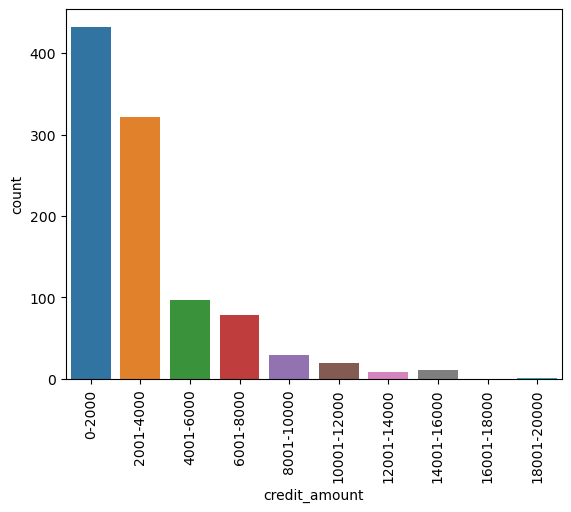

In [85]:
# Copy the dataframe to a local variable to avoid making changes to the original dataframe
local_df = df.copy()

# Group the credit_amount column into 10 categories 0-2000, 2001-4000, 4001-6000, 6001-8000, 8001-10000, 10001-12000, 12001-14000, 14001-16000, 16001-18000, 18001-20000
local_df['credit_amount'] = pd.cut(local_df['credit_amount'], bins=[0, 2000, 4000, 6000, 8000, 10000, 12000, 14000, 16000, 18000, 20000], labels=['0-2000', '2001-4000', '4001-6000', '6001-8000', '8001-10000', '10001-12000', '12001-14000', '14001-16000', '16001-18000', '18001-20000'])

# Plotting a graph of the number of data point in each credit_amount category
sns.countplot(x='credit_amount', data=local_df)

# angle the x-axis labels to avoid overlapping
plt.xticks(rotation=90)

### savings_status

In [88]:
# get the unique values in the savings_account column
df['savings_status'].unique()

array(['no known savings', '<100', '500<=X<1000', '>=1000', '100<=X<500'],
      dtype=object)

This is a categorical variable that describes the customer's savings status. The categories are as follows:

<!-- Table of categories -->
<table>
<thead>
  <tr>
    <th>Category</th>
    <th>Definition</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td>&lt; 100 DM</td>
    <td>They have less than 100 DM in savings</td>
  </tr>
  <tr>
    <td>100&lt; ... &lt; 500 DM</td>
    <td>They have between 100 and 500 DM in savings</td>
  </tr>
  <tr>
    <td>500&lt; ... &lt; 1000 DM</td>
    <td>They have between 500 and 1000 DM in savings</td>
  </tr>
  <tr>
    <td>&gt;= 1000 DM</td>
    <td>They have more than 1000 DM in savings</td>
  </tr>
  <tr>
    <td>unknown/no savings account</td>
    <td>They do not have a savings account</td>
  </tr>

<Axes: xlabel='savings_status', ylabel='count'>

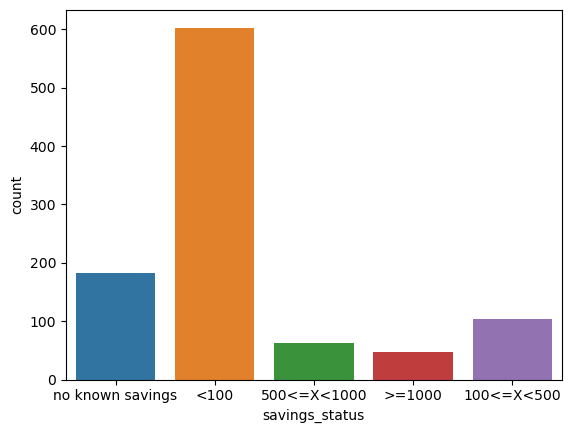

In [89]:
# Plotting a graph of the number of data point in each savings_account category
sns.countplot(x='savings_status', data=df)


Here we can see that the majority of customers have less than 100 DM in savings. This means that the model will be better at assessing customers with this savings status and may not be as accurate for customers with other savings statuses.

Text(0, 0.5, 'Percentage')

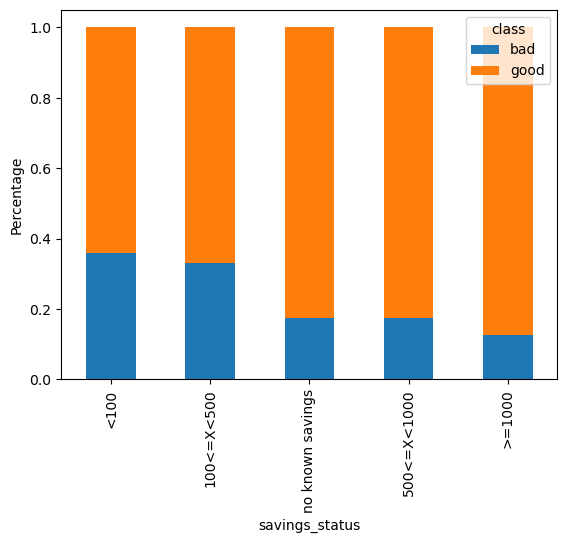

In [90]:
# For each category in the savings_account column, get the percentage of customers who are classed as good and bad then plot the results as a bar chart with two stacked bars for each category sorted by the percentage of bad customers
df.groupby('savings_status')['class'].value_counts(normalize=True).unstack().sort_values(by='bad', ascending=False).plot(kind='bar', stacked=True)

# Y axis label
plt.ylabel('Percentage')

Here we can see that the more money you have in savings, the higher the chance of being a good fit for credit. This makes sense as having more money in your savings means you are more likely to be able to pay back the credit.

### employment

In [91]:
# Get the unique values in the employment column
df['employment'].unique()

array(['>=7', '1<=X<4', '4<=X<7', 'unemployed', '<1'], dtype=object)

Employment is a categorical variable that describes the customer's employment status. The categories are as follows:

<!-- Table of categories -->
<table>
<thead>
  <tr>
    <th>Category</th>
    <th>Definition</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td>unemployed</td>
    <td>They are unemployed</td>
  </tr>
  <tr>
    <td>&lt; 1 year</td>
    <td>They have been employed for less than 1 year</td>
  </tr>
  <tr>
    <td>1&lt; ... &lt; 4 years</td>
    <td>They have been employed for between 1 and 4 years</td>
  </tr>
  <tr>
    <td>4&lt; ... &lt; 7 years</td>
    <td>They have been employed for between 4 and 7 years</td>
  </tr>
  <tr>
    <td>&gt;= 7 years</td>
    <td>They have been employed for more than 7 years</td>
  </tr>

<Axes: xlabel='employment', ylabel='count'>

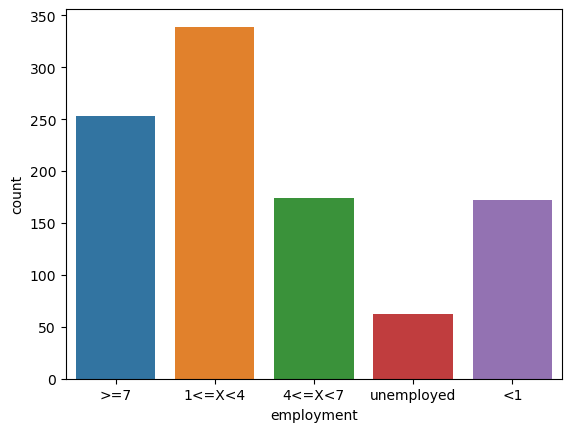

In [92]:
# Plotting a graph of the number of data point in each employment category
sns.countplot(x='employment', data=df)

We can see that we have a fairly even spread of customers across the categories. This means that the model will be able to assess customers with all employment statuses fairly well.

Text(0, 0.5, 'Percentage')

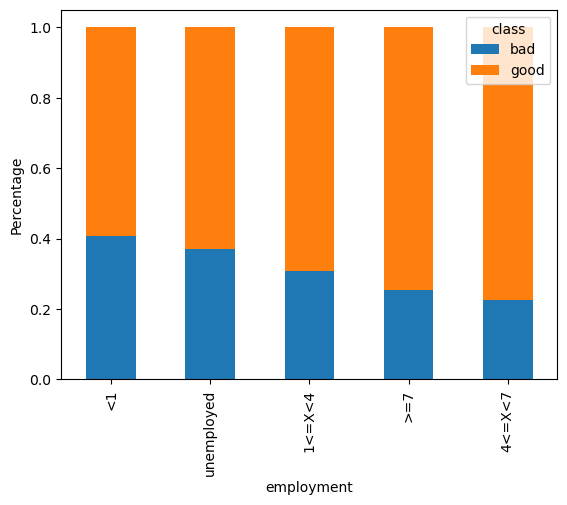

In [93]:
# For each category in the employment column, get the percentage of customers who are classed as good and bad then plot the results as a bar chart with two stacked bars for each category sorted by the percentage of bad customers
df.groupby('employment')['class'].value_counts(normalize=True).unstack().sort_values(by='bad', ascending=False).plot(kind='bar', stacked=True)

# Y axis label
plt.ylabel('Percentage')

As expected, the longer you have been employed, the more likely you are to be a good fit for credit. This is because you are more likely to have a stable income and therefore be able to pay back the credit.

### installment_commitment

In [95]:
# Get the unique values in the installment_commitment column
df['installment_commitment'].unique()

array([4., 2., 3., 1.])

the installment commitment is a numerical value that describes the percentage of disposable income that the customer will use to pay back the credit. The higher the value, the higher the percentage of disposable income that the customer has to pay back the credit.

<Axes: xlabel='installment_commitment', ylabel='count'>

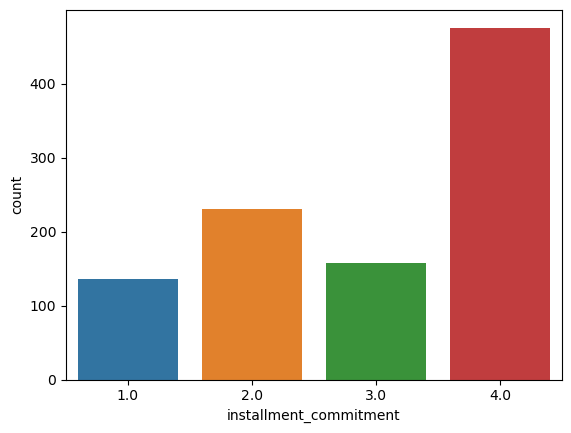

In [96]:
# Plotting a graph of the number of data point in each installment_commitment category
sns.countplot(x='installment_commitment', data=df)

We can see that the data has a bias to people who are paying back with 4% of their disposable income. This means that the model will be better at assessing customers with this installment commitment and may not be as accurate for customers with other installment commitments.

Text(0, 0.5, 'Percentage')

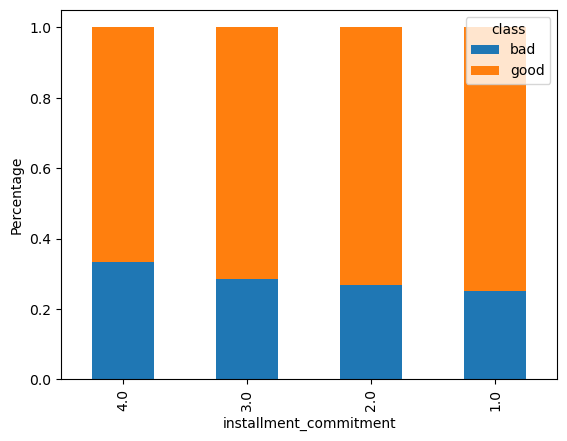

In [97]:
# For each category in the installment_commitment column, get the percentage of customers who are classed as good and bad then plot the results as a bar chart with two stacked bars for each category sorted by the percentage of bad customers
df.groupby('installment_commitment')['class'].value_counts(normalize=True).unstack().sort_values(by='bad', ascending=False).plot(kind='bar', stacked=True)

# Y axis label
plt.ylabel('Percentage')

As expected the lower the percentage of disposable income that the customer use to pay back the credit, the more likely they are to be a good fit for credit. This is because they have more disposable income to pay back the credit.

### personal_status

In [98]:
# Get the unique values in the personal_status column
df['personal_status'].unique()

array(['male single', 'female div/dep/mar', 'male div/sep',
       'male mar/wid'], dtype=object)

Here personal_status has information on their sex and marital status. For best results these should be split into two separate variables.

In [ ]:
# Splitting the personal_status column into two columns one for sex and the other for marital status using space as the delimiter

# Creating a new column in the df for sex

